In [1]:
def DFtoUSE(df,rpc_threshfold,Normal_RP,MS2_RP,RNAseq):
    RP_include = df_base_CDS['gene'].isin(df_base_CDS['gene']) # just make all rows to be TRUE 
    MS2_include = RP_include # just make all rows to be TRUE 
    RNA_include = RP_include # just make all rows to be TRUE
    if Normal_RP != 'no':
        RP_include = df_base_CDS[Normal_RP+'_rpc'] > rpc_threshfold
    if MS2_RP != 'no':
        MS2_include = df_base_CDS[MS2_RP+'_rpc'] > rpc_threshfold
    if RNAseq != 'no':
        RNA_include = df_base_CDS[RNAseq+'_rpc'] > rpc_threshfold
    df_to_use = df[RP_include & MS2_include & RNA_include]
    return df_to_use

In [2]:
import pickle
import numpy as np
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline


mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
df_base_CDS = pd.read_csv('SDfigure.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]
df_base_CDS['negative_SD_aSD']=df_base_CDS['SD_aSD']*-1
df_base_CDS

,gene,ks57_reads,ks57_rpc,ks57_rpkm,ks58_reads,ks58_rpc,ks58_rpkm,ks59_reads,ks59_rpc,ks59_rpkm,...,Zhang_mmc2_Gini_6hr,Zhang_mmc2_TE_30min,Zhang_mmc2_TE_6hr,Zhang_mmc2_Filter_vivo,Zhang_mmc2_Gini_vitro,Zhang_mmc2_Gini_ksg,Zhang_mmc2_Filter_vitro_ksg,Shape_median,Shape_seq,negative_SD_aSD
0,aaaD,3.0,0.029126,2.921452,2.0,0.019417,2.100146,2.0,0.019417,1.054992,...,0.940,NaN,NaN,NO,0.926,0.987,NO,NaN,NaN,5.184330
1,aaaE,7.0,0.018519,1.857466,1.0,0.002646,0.286131,3.0,0.007937,0.431207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.724650
2,aaeA,2.0,0.006431,0.645037,1.0,0.003215,0.347773,7.0,0.022508,1.222909,...,0.782,0.000,1.698,NO,0.815,0.929,NO,NaN,NaN,4.107930
3,aaeB,3.0,0.004573,0.458704,3.0,0.004573,0.494623,8.0,0.012195,0.662587,...,0.772,0.000,0.000,NO,0.825,0.934,NO,NaN,NaN,1.523445
4,aaeR,76.0,0.245161,24.590456,81.0,0.261290,28.260511,88.0,0.283871,15.423305,...,0.676,0.390,0.638,NO,0.705,0.835,NO,NaN,NaN,0.359835
5,aaeX,2.0,0.029412,2.950093,0.0,0.000000,0.000000,4.0,0.058824,3.196006,...,0.884,0.318,2.095,NO,0.819,0.947,NO,NaN,NaN,1.747805
6,aas,165.0,0.229167,22.986145,158.0,0.219444,23.734565,235.0,0.326389,17.733393,...,0.617,0.390,1.771,NO,0.671,0.799,NO,NaN,NaN,5.931100
7,aat,50.0,0.212766,21.341101,38.0,0.161702,17.489299,49.0,0.208511,11.328820,...,0.695,0.091,0.287,NO,0.657,0.805,NO,NaN,NaN,3.607930
8,abgA,4.0,0.009153,0.918107,4.0,0.009153,0.990000,19.0,0.043478,2.362265,...,0.915,0.000,0.000,NO,0.970,0.985,NO,NaN,NaN,3.656165
9,abgB,6.0,0.012448,1.248587,8.0,0.016598,1.795145,5.0,0.010373,0.563611,...,0.942,0.000,0.000,NO,0.965,0.985,NO,NaN,NaN,5.395080


In [4]:
Normal_RP = 'ks168'
MS2_RP = 'ks176ks159'
RNAseq = 'no'
data_for_sorting = 'FD_RP_ks168/ks176ks159' 
rpc_threshfold = 0.1

base = 'SD_aSD'

df_to_use = DFtoUSE(df_base_CDS,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

In [5]:
deltaG_list = [-7.5+x*0.5 for x in range(0,16)]

SaS_low_list = []
SaS_high_list = []
x = 0
while x < len(deltaG_list)-1:
    SaS_low_list.append(df_to_use[base] > deltaG_list[x])
    SaS_high_list.append(df_to_use[base] <= deltaG_list[x+1])
    x+=1
    
SaS_DF_list = []
x=0
while x <len(SaS_low_list):
    SaS_DF_list.append(df_to_use[SaS_low_list[x]&SaS_high_list[x]])
    x+=1

In [6]:
DF_coupling=[]

QT_list_top = [1.0,0.2]
QT_list_bottom = [0.8,0.0]

x = 0
while x < len(QT_list_top):
    DF_list = []
    for SaS_DF in SaS_DF_list:
        top = SaS_DF[data_for_sorting] <= SaS_DF[data_for_sorting].quantile(QT_list_top[x])
        bottom = SaS_DF[data_for_sorting] >= SaS_DF[data_for_sorting].quantile(QT_list_bottom[x])
        DF_list.append(SaS_DF[top&bottom])
    DF_concatenate = DF_list[0]
    y = 1
    while y < len(DF_list):
        DF_concatenate = pd.concat([DF_concatenate,DF_list[y]])    
        y+=1
    DF_coupling.append(DF_concatenate) 
    x+=1

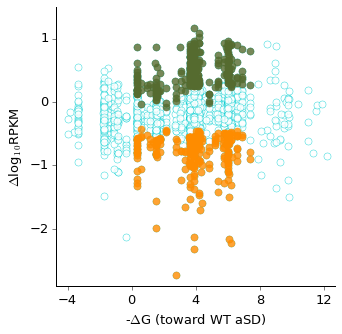

In [8]:
xaxis = 'negative_SD_aSD'
yaxis = 'FD_RP_ks168/ks176ks159' 

fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
#fig.set_dpi(500)

x_data = df_to_use[xaxis]
y_data = df_to_use[yaxis].apply(np.log10).replace([np.inf,-np.inf],np.nan)
sns.regplot(x=x_data,y=y_data,ci=68, ax=ax1, fit_reg=False, color = 'darkturquoise',scatter_kws={'facecolor':'white','s':50})          

x = 0
colors = ['darkolivegreen','darkorange']
while x < len(DF_coupling):
    x_data = DF_coupling[x][xaxis]
    y_data = DF_coupling[x][yaxis].apply(np.log10).replace([np.inf,-np.inf],np.nan)
    sns.regplot(x=x_data,y=y_data,ci=68, ax=ax1, fit_reg=False, color = colors[x],scatter_kws={'facecolor':colors[x],'s':50})                
    x+=1

plt.tick_params(labelsize=13)
ax1.set_xlim(-4.7,12.7,)
ax1.set_ylim(-2.9,1.5)
plt.xticks([-4,0,4,8,12])
plt.yticks([-2,-1,0,1])

plt.xlabel('-'+'$\Delta$'+'G (toward WT aSD)', fontsize=13)
plt.ylabel('$\Delta$'+'log'+'$_1$'+'$_0$'+'RPKM', fontsize=13)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
sns.despine()

#plt.savefig('coupling_cold_scatter.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)

In [9]:
def boxplot_coupling(d_list):
    palette_box = ['darkolivegreen','darkorange']

    axis = sns.boxplot(data=d_list,
                     showfliers=False,linewidth=3,
                     palette=palette_box,
                     capprops={'color': 'black', 'linewidth': 3,"zorder":10},
                     medianprops = {'color': 'black', 'linewidth': 5,"zorder":10}, 
                     boxprops = {'edgecolor': 'black', 'linewidth': 0},
                     whiskerprops={'color': 'black','linewidth':1, "zorder":10})
    axis.xaxis.set_ticks_position('bottom')
    axis.yaxis.set_ticks_position('left')

# mRNA abundance

In [10]:
data_point = 'ks108_rpkm' 
d_list = []

x = 0
while x < len(DF_coupling):
    d_list.append(DF_coupling[x][data_point].apply(np.log10).replace([np.inf,-np.inf],np.nan))
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

63430.5
1.0
63430.5
2.09949907844762e-29


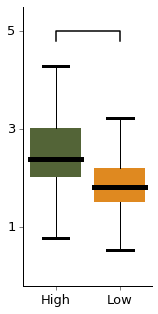

In [11]:
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 4.8, 5
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([1,3,5])
plt.tick_params(labelsize=13) 
plt.ylim(-0.2,5.5)
sns.despine()
#plt.savefig('coupling_figure/coupling_cold_mRNA.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# SHAPE

In [12]:
data_point = 'Shape_median' 
d_list = []

x = 0
while x < len(DF_coupling):
    d_list.append(DF_coupling[x][data_point].values)
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print stat
print p
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print stat
print p

58021.5
1.0
58021.5
1.1778282165985073e-17


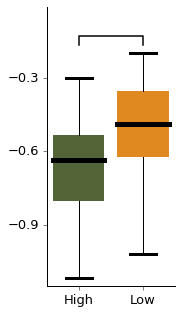

In [13]:
negative_shape_list = []
for shape_data in d_list:
    negative_shape_list.append(shape_data * -1.0)
d_list=negative_shape_list

fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, -0.165, -0.13
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([-0.9,-0.6,-0.3])
plt.ylim(-1.15, -0.01)
plt.tick_params(labelsize=13) #####
sns.despine()
#plt.savefig('coupling_figure/coupling_cold_mRNA.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# GINI_ColdShock

610.0____0.9999998382421126
610.0____1.6625528466550672e-07


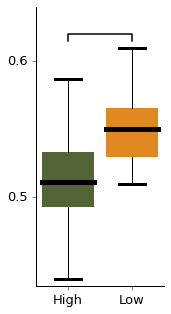

In [15]:
data_point = 'Zhang_mmc2_Gini_30min' 
d_list = []

x = 0
while x < len(DF_coupling):    
    filtered = DF_coupling[x]['Zhang_mmc2_Filter_vivo'] == 'YES'
    df_filtered = DF_coupling[x][filtered]
    d_list.append(df_filtered[data_point])
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print str(stat)+'____'+str(p)
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print str(stat)+'____'+str(p)   

fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 0.615, 0.62
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([0,0.4,0.5,0.6])
plt.ylim(0.435,0.64)
plt.tick_params(labelsize=13) #####
sns.despine()

#plt.savefig('coupling_figure/coupling_cold_GINIORF_30.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####

# GINI

4982.0____0.9999999999994458
4982.0____5.599801018312064e-13


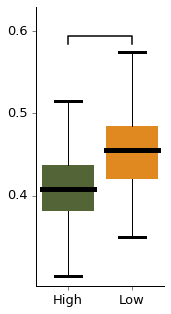

In [16]:
data_point = 'GINI' 
d_list = []

x = 0
while x < len(DF_coupling):
    filtered = DF_coupling[x][data_point].notnull()
    df_filtered = DF_coupling[x][filtered]
    d_list.append(df_filtered[data_point])
    x+=1

stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='greater')
print str(stat)+'____'+str(p)
stat, p = stats.mannwhitneyu(d_list[0], d_list[1],alternative='less')
print str(stat)+'____'+str(p)
    
fig, ax = plt.subplots()
#fig.set_dpi(500) #####
fig.set_size_inches(2.3, 5)
ax = boxplot_coupling(d_list)

x1, x2, y1, y2 = 0, 1, 0.585, 0.595
plt.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, color='black')

plt.xticks([0,1],['High','Low'])
plt.yticks([0.4,0.5,0.6])
plt.ylim(0.29,0.63)
plt.tick_params(labelsize=13) #####
sns.despine()

#plt.savefig('coupling_figure/coupling_cold_GINIORF.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0) #####